# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

In [1]:
!ls data/

customers.csv  purchases.csv  shops.csv


First, let us load these datasets and make a quick glance on them.

### Problem 1 (autograded)
Load datasets intro variables `customers`, `purchases` and `shops`. Use `pd.read_csv`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
customers = pd.read_csv('data/customers.csv')
purchases = pd.read_csv('data/purchases.csv')
shops = pd.read_csv('data/shops.csv')

In [4]:
from hashlib import md5
import numpy as np


def test_df(frame, digest):
    obtained = md5(
        "".join(
            [str(x) for x in np.c_[frame.head().values, frame.tail().values]]
        ).encode("utf8")
    ).hexdigest()
    assert obtained == digest, "Something wrong with files: " + obtained


test_df(customers, "a8c3a3d5d5f93d721f7f98564228a484")
test_df(purchases, "1d4ffa7e30dcd29ab1d47d3731967a49")
test_df(shops, "e017f3f83ad39610a7d82a54480fb98f")
print("Great, everything loaded successfully!")

Great, everything loaded successfully!


### Problem 2 (quiz)

Investigate dataframes and answer the following questions (in the appropriate Quiz):

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

Note that you have to provide your answers based on the meaning of the data, not on the Python object types of the corresponding column.

In [36]:
print(purchases.dtypes['customer_id'], end="\n")
print(customers.dtypes['age'])

float64
float64


================================================================================================================

ID is a qualitative variable, although its values are numbers, they are unique identifiers, each customer has its own ID and any other customer has the same one. it does not make sense to perform any mathematical operation with its values. So, it is a nominal variable. 

Age is a quantitative variable, it expresses a quantity and has magnitude. 

================================================================================================================


### Problem 3 (SGA)
Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable? Write your answer and full explanation in the cell below.


A set of random variables are considered independent and identically distributed (i.i.d.) if each random variable has the same probability distribution and all are mutually independent. Assuming that the total price is the total amount spent by the customer, it may have a similar distribution that another amount in the purchase, i.e the highest price in the purchase. Even if the distribution is identical, these two variables would not be independent, we would expect a high correlation between them. Then, we cannot assume that total_price is an i.d.d sample from another random variable. 

### Problem 4 (quiz)
Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


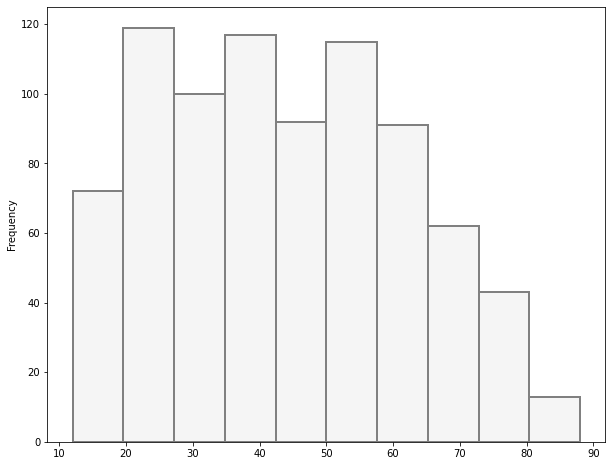

In [8]:
customers['age'].plot.hist(figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')


### Problem 5 (quiz)
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [9]:
customers["age"].median()


43.0

================================================================================================================

Distribution is not skewed, mean and median are close (mean = 43.79, median = 43), so age = 43 splits the distribution into two equal parts, it is a good choice for the threshold.  

================================================================================================================

### Problem 6 (quiz)

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable. There is a special data type in pandas to represent date and time. However, by default `pd.read_csv` does not try to guess that a particular column contains something that looks like a date and reads it just as a column of strings. So let's convert this column manually using function `pd.to_datetime` first:


In [11]:
purchases["date"] = pd.to_datetime(purchases["date"])

Let's check that `date` has correct `dtype`:

In [12]:
purchases["date"].dtype

dtype('<M8[ns]')

This should return something like `dtype('datetime64[ns]')` or `dtype('<M8[ns]')`. It is much easier to work with dates when they are converted to native datetime format instead of strings. For example, you can find the difference between two dates and do a lot of other things. To extract different features of date like month of even day of week, one can use `.dt` accessor (similar to using `.str` accessor to access string methods), see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) for details. For example, this is how we can extract day of week (Monday=0, Sunday=6):

In [13]:
purchases["date"].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int64

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable. Use an appropriate tool to visualize it.

Make this bar plot. 

**Hint.** To sort the values on the horizontal axis one can use `.sort_index()`.


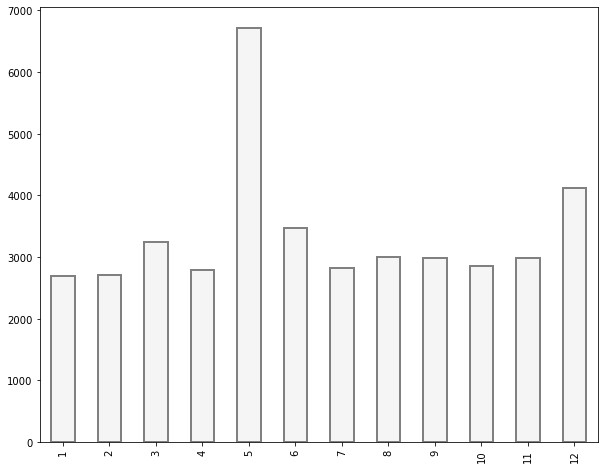

In [14]:
purchases['month'] = purchases['date'].dt.month
month_counts = purchases['month'].value_counts().sort_index()
month_counts.plot.bar(figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')

================================================================================================================

The fact that December is a hot month for retail due to Christmas is suggested by the data. There are a larger number of purchases in comparison with the other months. The remaining months look similar to each other, except for May, which shows an unusually high number of purchases (almost twice than the remaining months). 

================================================================================================================

### Problem 7 (SGA)

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer. Write it in the cell below. Add new cells to include code / explanations as necessary.

================================================================================================================

It shows the number of purchases by month and year. The majority of months are represented in the sample in just one year, except for May and June, which make these months not comparable with the remaining months. In the case of May, if we keep just one year the number of purchases does not seem too different in comparison with the other months (except for December, which has the largest number of purchases), and it is not too much different if we keep the year 2018 or 2019. Sample for all months should correspond to just one year in order to make comparisons valid. 

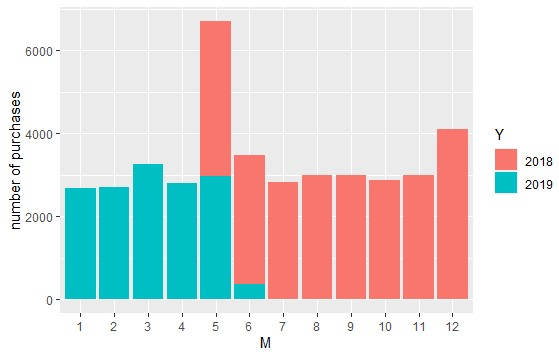

================================================================================================================

### Problem 8 (quiz)
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year. Use `groupby` with the `month` variable you (hopefully) created earlier.

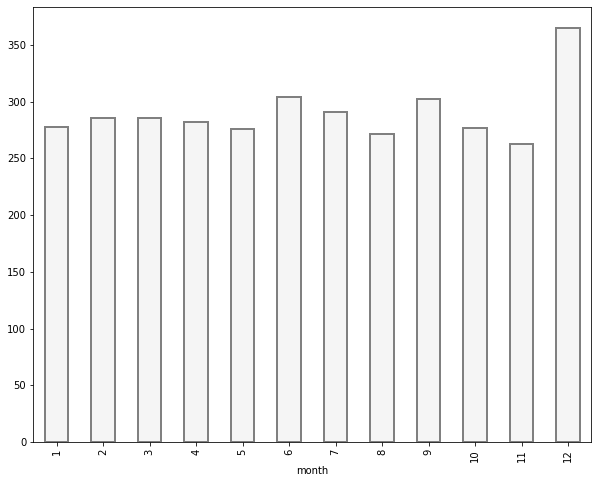

In [16]:
purchases_by_months = purchases.groupby(by=['month'])['total_price'].mean()
purchases_by_months.plot.bar(figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')

================================================================================================================

People do not only go shopping more often in December, but data also suggest that they spent more money during this month. 

================================================================================================================

### Problem 9 (quiz)
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

To do so, let us find the average purchase price in each month in each shop (hint: use `.pivot_table`), then extract two samples: one contains average purchase prices in December and another in November. The number of elements in each sample should be equal to the number of shops. Is it true that they are different? Use the statistical test that suits this problem the best with a two-sided alternative. Then answer the question in a quiz.


In [17]:
import scipy.stats

average_purchases = purchases.pivot_table(values=["total_price"], index=["shop_id"], columns=["month"])
scipy.stats.ttest_ind(average_purchases.iloc[:, 10], average_purchases.iloc[:, 11], equal_var=False)


Ttest_indResult(statistic=-8.149108896744021, pvalue=1.7126570585051986e-13)

================================================================================================================

T-test showed statistically significant differences in the mean purchase total price between November and December (t = -8.15, p < 0.05). As suggested by the plot, it seems that, on average, people spent more money during December. 

================================================================================================================

### Problem 10 (autograded)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase. Call the resulting table `purchases_c`. This table should contain all purchases by the registered customers, but rows that correspond to unregistered customers (not present in `customers`) should be dropped. The resulting table also should contain column `customer_id`.

In [18]:
purchases_c = purchases.join(customers.set_index('customer id'), on='customer_id').dropna(subset = ['customer_id'])


In [19]:
assert (
    purchases_c[lambda x: x["customer_id"] == 123]["age"]
    == customers.set_index("customer id").loc[123]["age"]
).all()
assert (
    purchases_c[lambda x: x["customer_id"] == 12]["age"]
    == customers.set_index("customer id").loc[12]["age"]
).all()
assert sum(purchases_c["customer_id"]) == 17548008.0

### Problem 11 (autograded)

In [20]:
purchases_c

,customer_id,date,shop_id,total_price,month,age
0,0.0,2018-05-04,40,289.673291,5,38.0
1,0.0,2019-01-26,40,1316.898901,1,38.0
2,0.0,2018-11-18,42,159.414367,11,38.0
3,0.0,2018-05-12,42,808.791649,5,38.0
4,0.0,2019-04-20,42,1207.855038,4,38.0
...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,24.0
28795,1212.0,2018-07-20,60,50.592132,7,24.0
28796,1212.0,2019-04-18,15,95.459705,4,24.0
28797,1212.0,2019-02-14,60,69.968788,2,24.0


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`. Indexes of the new dataframe should be customer id's. Put the resulting dataframe to variable `purchases_c_mean`.


In [21]:
purchases_c_mean = purchases_c.groupby("customer_id").agg({"age": "first", "total_price": "mean"})


In [22]:
assert (
    purchases_c_mean.loc[12]["total_price"]
    == purchases_c.query("customer_id == 12")["total_price"].mean()
)
assert (
    purchases_c_mean.loc[125]["total_price"]
    == purchases_c.query("customer_id == 125")["total_price"].mean()
)

### Problem 12 (quiz)
Use dataframe `purchases_c_mean` to visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

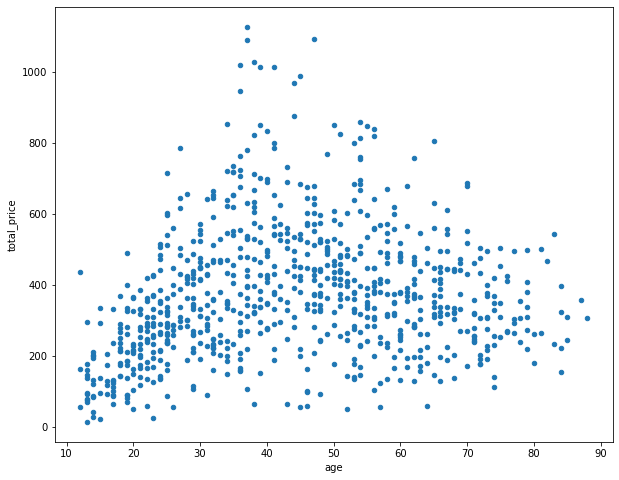

In [23]:
purchases_c_mean.plot.scatter(figsize=(10, 8), x="age", y="total_price")


================================================================================================================

Notice that it seems to be a good positive linear relationship between age and the total amount of money spent by purchase for an age range between 10 and 40, whereas beyond age = 40 the relationship is not too clear, even the relationship seems to be opposed to the one observed for ages between 10 and 40.  It may be useful to assess this relationship for two age groups, above and below 40 (or 43 as seen before). This also suggests that the threshold suggested in problem 5 is a good guideline to create age-targeted offers.

================================================================================================================

### Problem 13 (quiz)
Find Pearson's correlation coefficient between age and total price.

In [25]:
correlation_coefficient = purchases_c_mean.corr()
correlation_coefficient

,age,total_price
age,1.000000,0.165395
total_price,0.165395,1.000000


### Problem 14 (quiz)
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age). Use method `.dropna()` to remove such rows from the dataset, then perform statistical testing with `pearsonr`. This function returns a two-tuple: first value is correlation coefficient and the second is p-value that corresponds to a test where the null hypothesis is that the correlation in population is zero.

In [26]:
purchases_clean = purchases_c_mean.dropna(subset=["age"])
scipy.stats.pearsonr(purchases_clean["age"], purchases_clean["total_price"])

(0.165395081207719, 1.811078910330637e-06)

================================================================================================================

The correlation is statistically significant (r = 0.1654, p < 0.05), but notice that it is weak. The correlation coefficient is below 0.5. This low correlation may be due to patterns noticed in the dispersion plot. Assessing the relationship for two age groups separately (one for ages between 10 and 40, and the other for ages above 40) could produce better results. 

================================================================================================================

### Problem 15 (autograded)
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [27]:
full_df_preliminary = purchases.join(shops.set_index('shop_id'), on='shop_id').dropna()
full_df_preliminary

,customer_id,date,shop_id,total_price,month,offer_begin,offer_end
0,0.0,2018-05-04,40,289.673291,5,2018-08-15,2018-09-10
1,0.0,2019-01-26,40,1316.898901,1,2018-08-15,2018-09-10
2,0.0,2018-11-18,42,159.414367,11,2018-12-14,2019-01-21
2,0.0,2018-11-18,42,159.414367,11,2018-12-12,2019-01-04
3,0.0,2018-05-12,42,808.791649,5,2018-12-14,2019-01-21
...,...,...,...,...,...,...,...
28792,1212.0,2018-09-15,60,376.900870,9,2018-07-07,2018-08-02
28794,1212.0,2018-11-08,60,46.653544,11,2018-07-07,2018-08-02
28795,1212.0,2018-07-20,60,50.592132,7,2018-07-07,2018-08-02
28797,1212.0,2019-02-14,60,69.968788,2,2018-07-07,2018-08-02


In [28]:
assert (
    full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
        "offer_begin"
    ].iloc[0]
    == "2018-08-15"
)
assert (
    full_df_preliminary.query('date == "2018-08-24" and customer_id == 686.0').max()[
        "offer_end"
    ]
    == "2019-01-21"
)

### Problem 16 (autograded)
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier. To create a column that coincides with the index one can use method `.reset_index()`.

Apply `.reset_index()` to `purchases_c`, then repeat the join from the previous problem. Name the resulting dataframe `full_df`.

In [29]:
full_df = purchases_c.reset_index().join(shops.set_index('shop_id'), on='shop_id').dropna()
full_df

,index,customer_id,date,shop_id,total_price,month,age,offer_begin,offer_end
0,0,0.0,2018-05-04,40,289.673291,5,38.0,2018-08-15,2018-09-10
1,1,0.0,2019-01-26,40,1316.898901,1,38.0,2018-08-15,2018-09-10
2,2,0.0,2018-11-18,42,159.414367,11,38.0,2018-12-14,2019-01-21
2,2,0.0,2018-11-18,42,159.414367,11,38.0,2018-12-12,2019-01-04
3,3,0.0,2018-05-12,42,808.791649,5,38.0,2018-12-14,2019-01-21
...,...,...,...,...,...,...,...,...,...
28792,28792,1212.0,2018-09-15,60,376.900870,9,24.0,2018-07-07,2018-08-02
28794,28794,1212.0,2018-11-08,60,46.653544,11,24.0,2018-07-07,2018-08-02
28795,28795,1212.0,2018-07-20,60,50.592132,7,24.0,2018-07-07,2018-08-02
28797,28797,1212.0,2019-02-14,60,69.968788,2,24.0,2018-07-07,2018-08-02


In [30]:
assert (
    full_df.query("index == 1207")
    .iloc[0][["customer_id", "date", "shop_id", "total_price"]]
    .equals(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])
)

### Problem 17 (autograded)
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer? Add a column `offer` that contains values `True` or `False` that answer this question. To do so, we have to compare the value in column `date` with values in columns `offer_begin` and `offer_end`. Let us assume that `offer_end` is the last day of the offer (so the offer still holds during this day). Name the corresponding dataframe `full_df_offer`. Note that you can compare between dates, but not between dates and strings. Convert your data appropriately.


In [31]:
full_df['date'] = pd.to_datetime(full_df['date'])
full_df['offer_begin'] = pd.to_datetime(full_df['offer_begin'])
full_df['offer_end'] = pd.to_datetime(full_df['offer_end'])

full_df["offer"] = (full_df['date'] >= full_df['offer_begin']) & (full_df['date'] <= full_df['offer_end'])
full_df_offer = full_df

In [32]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]

### Almost here
Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [33]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,0.0,2018-05-04,40,289.673291,5,38.0,False
1,0.0,2019-01-26,40,1316.898901,1,38.0,False
2,0.0,2018-11-18,42,159.414367,11,38.0,False
3,0.0,2018-05-12,42,808.791649,5,38.0,False
4,0.0,2019-04-20,42,1207.855038,4,38.0,False
...,...,...,...,...,...,...,...
28792,1212.0,2018-09-15,60,376.900870,9,24.0,False
28794,1212.0,2018-11-08,60,46.653544,11,24.0,False
28795,1212.0,2018-07-20,60,50.592132,7,24.0,True


### Problem 18 (quiz)
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns. Use two-sided alternative.




In [34]:
dependence_offer = purchases_offer[purchases_offer.month != 12]
dependence_offer = dependence_offer[['customer_id', 'total_price', 'offer']]
dependence_offer = dependence_offer.groupby(['customer_id', 'offer'])['total_price'].mean().unstack(level=1).dropna()
scipy.stats.ttest_rel(dependence_offer.iloc[:, 0], dependence_offer.iloc[:, 1])


Ttest_relResult(statistic=-16.07976216811603, pvalue=9.546909582875114e-50)

================================================================================================================

The T-test is statistically significant ( t = -16.079, p < 0.05), so the mean amount of money spent during a special offer is different from the mean amount of money spent on other days. It seems that people spent more money on these special offers. 

================================================================================================================